# Assignment #2 - Classification

<font color="red"> <b> Due: April 10  EOD</b> </font>

<font color="blue"> Ananth Deepak Sharma Nanduri </font>

# I. Introduction

Describe the objective of this assignment. You can briefly state how you accompilsh it.

The objective of this assignment is to implement 4 of the 5 algorithms from the PRML package and compare the results of each of them using any metric.

# II. Data

You may choose one of the following three datasets to work on. Introduce your data and visualize them. Describe your observations about the data. 
1. https://archive.ics.uci.edu/ml/datasets/covertype
2. https://archive.ics.uci.edu/ml/datasets/bank+marketing
3. https://archive.ics.uci.edu/ml/datasets/Activity+recognition+using+wearable+physiological+measurements


In [278]:
import pandas as pd

df = pd.read_csv('bank.csv', header=0, sep=';')

# III. Method

Summarize the Least Mean Square Classifier, Fisher Linear Discriminant, Perceptron,logistic regression, and Neural Network.
Do not forget explain your implementation. 

The explanation of your codes should not be the comments in a code cell. 
Each implementation will be followed by a separate cell that should include
 - review of the 4 classification models 
 - your implementation and description


### Method

In [279]:
import numpy as np
import abc
from prml.linear import least_squares_classifier, fishers_linear_discriminant, perceptron, logistic_regression


#Importing all the necessary modules 


##your method implementation goes here

In [280]:
df.columns
#To get the names of all columns in the Dataset

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [281]:
from sklearn import preprocessing
#ENcoding the data i.e. converting the strings to integer of respective class.
from sklearn import preprocessing
L= preprocessing.LabelEncoder()
df['age']= L.fit_transform(df['age'])
df['job']= L.fit_transform(df['job'])
df['marital']= L.fit_transform(df['marital'])
df['education']= L.fit_transform(df['education'])
df['default']= L.fit_transform(df['default'])
df['housing']= L.fit_transform(df['housing'])
df['contact']= L.fit_transform(df['contact'])
df['month']= L.fit_transform(df['month'])
df['poutcome']= L.fit_transform(df['poutcome'])
df['loan']= L.fit_transform(df['loan'])
df['y']= L.fit_transform(df['y'])

In [282]:
#Separating the X_train and Y labels
df.head()
feature_cols = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome']
y = np.asarray(df['y'] )
x = np.asarray(df[feature_cols])

In [283]:
print(x.shape)
print(y.shape)

(4521, 16)
(4521,)


In [284]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,11,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,14,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,16,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,11,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,40,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


In [285]:
#Scaling the Data
x_size_rows= x.shape[0]
x_size_cols= x.shape[1]
x_scales = np.zeros(np.shape(x))
for col in range(0,x_size_cols):
    min=x[:,col].min()
    max=x[:,col].max()
    for row in range(0,x_size_rows):
        x_scales[row][col]= (x[row][col]-min)/(max-min)

In [286]:
from sklearn.model_selection import train_test_split
# SPlitting the data in to Training and Test Data Set
X_train, X_test, y_train, y_test = train_test_split(x_scales, y, test_size=0.2, random_state=1)

In [287]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(3616, 16) (905, 16)
(3616,) (905,)


In [288]:
from sklearn import metrics
# Implementing the Least Squares Classifier
linear_sq_classifier = least_squares_classifier.LeastSquaresClassifier()
linear_sq_classifier.fit(X_train,y_train)
y_pred = linear_sq_classifier.classify(X_test)
accuracy_score_lq = metrics.accuracy_score(y_test, y_pred)
print("Accuracy of the Least Squares Classifier model is : ",accuracy_score_lq)


Accuracy of the Least Squares Classifier model is :  0.8773480662983425


1. We have implemented the least squares classifier from the prml package, we have created a variable which initializes the class LeastSquaresClassifier.<br>
2. Then we use that variable to fit the X_train and Y_train. Once the model is trained we use the classify method in the the module to predict the outcomes for the datapoints in the test dataset.<br>
 3. We then store the predicted values in an array y_pred. Then we use the metrics module in the sklearn package to find the accuracy score of the model.<br>
 4. We observed that the accuracy of this model is 0.8838495575221239.

In [289]:
#Implementing the Fischers Linear Discriminant
fld = fishers_linear_discriminant.FishersLinearDiscriminant()
fld.fit(X_train,y_train)
y_pred_fisher = fld.classify(X_test)
accuracy_score_fischer = metrics.accuracy_score(y_test, y_pred_fisher)
print("Accuracy of the Fischers Linear Discriminant model is : ",accuracy_score_fischer)

Accuracy of the Fischers Linear Discriminant model is :  0.8066298342541437


1. We have implemented the Fischer's Linear Discriminant from the prml package, we have created a variable which initializes the class FishersLinearDiscriminant.<br>
2. Then we use that variable to fit the X_train and Y_train. Once the model is trained we use the classify method in the the module to predict the outcomes for the datapoints in the test dataset.<br>
 3. We then store the predicted values in an array y_pred_fischer. Then we use the metrics module in the sklearn package to find the accuracy score of the model.<br>
 4. We observed that the accuracy of this model is 0.8152654867256637

In [290]:
# Implementing the Logistic Regression
lr = logistic_regression.LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.classify(X_test)
accuracy_score_lr = metrics.accuracy_score(y_test, y_pred_lr)
print("Accuracy of the Logistic Regression model is : ",accuracy_score_lr)

Accuracy of the Logistic Regression model is :  0.8773480662983425


1. We have implemented the logistic_regression from the prml package, we have created a variable which initializes the class LogisticRegression.<br>
2. Then we use that variable to fit the X_train and Y_train. Once the model is trained we use the classify method in the the module to predict the outcomes for the datapoints in the test dataset.<br>
 3. We then store the predicted values in an array y_pred_lr. Then we use the metrics module in the sklearn package to find the accuracy score of the model.<br>
 4. We observed that the accuracy of this model is 0.8860619469026548

In [291]:
#Implementing Perceptron
prtn = perceptron.Perceptron()
prtn.fit(X_train,y_train)
y_pred_prtn = prtn.classify(X_test)
accuracy_score_prtn = metrics.accuracy_score(y_test, y_pred_prtn)
print("Accuracy of the Perceptron model is : ",accuracy_score_prtn)

Accuracy of the Perceptron model is :  0.1270718232044199


1. We have implemented the perceptron from the prml package, we have created a variable which initializes the class Perceptron.<br>
2. Then we use that variable to fit the X_train and Y_train. Once the model is trained we use the classify method in the the module to predict the outcomes for the datapoints in the test dataset.<br>
 3. We then store the predicted values in an array y_pred_prtn. Then we use the metrics module in the sklearn package to find the accuracy score of the model.<br>
 4. We observed that the accuracy of this model is 0.12389380530973451


# IV. Experiments

Apply the classfiers on the data and discuss the results.
Please describe your codes for experiments. You may have subsections of results and discussions here.
Here follows the list that you consider to include:
- the classification results
- plots of classification results 
- model comparision 
- choice of evaluation metrics
- **Must partition data into training and testing**

F1 score for Logistic Regression is :  0.3105590062111801
[[769  21]
 [ 90  25]]


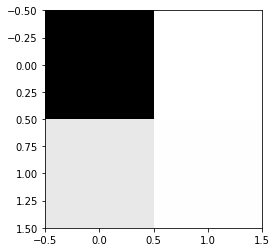

In [292]:
# Printing out the Confusion Matrix for each of the Model
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
from sklearn.metrics import f1_score
f1_score_lr = f1_score(y_test, y_pred_lr)  
print("F1 score for Logistic Regression is : ", f1_score_lr)

confusion_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print(confusion_matrix_lr)
plt.imshow(confusion_matrix_lr, cmap='binary')


F1 score for Fischer Linear Discriminant is :  0.4807121661721069
[[649 141]
 [ 34  81]]


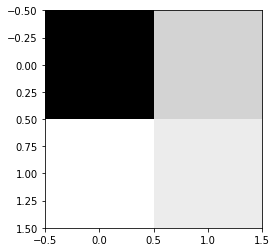

In [293]:
confusion_matrix_fisher = confusion_matrix(y_test, y_pred_fisher)
f1_score_fischer = f1_score(y_test, y_pred_fisher)  
print("F1 score for Fischer Linear Discriminant is : ", f1_score_fischer)
print(confusion_matrix_fisher)
plt.imshow(confusion_matrix_fisher, cmap='binary')




F1 score for Perceptron is :  0.22549019607843138
[[  0 790]
 [  0 115]]


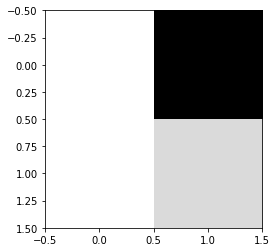

In [294]:
confusion_matrix_prtn = confusion_matrix(y_test, y_pred_prtn)
f1_score_prtn = f1_score(y_test, y_pred_prtn)  
print("F1 score for Perceptron is : ", f1_score_prtn)
print(confusion_matrix_prtn)
plt.imshow(confusion_matrix_prtn, cmap='binary')


F1 score for Least Squares Classifier is :  0.17777777777777776
[[782   8]
 [103  12]]


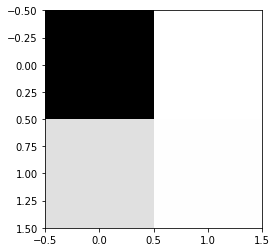

In [295]:
confusion_matrix_lq = confusion_matrix(y_test, y_pred)
f1_score_lq = f1_score(y_test, y_pred)  
print("F1 score for Least Squares Classifier is : ", f1_score_lq)
print(confusion_matrix_lq)
plt.imshow(confusion_matrix_lq, cmap='binary')

[0.8066298342541437, 0.8773480662983425, 0.1270718232044199, 0.8773480662983425]
['Fischer Linear Discriminant', 'Logistic Regression', 'Perceptron', 'Least Squares Classifier']


Text(0.5, 0, 'Model')

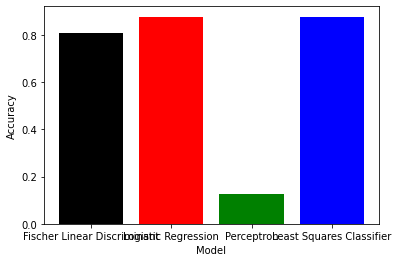

In [296]:
accuracy_list = [accuracy_score_fischer, accuracy_score_lr, accuracy_score_prtn, accuracy_score_lq]
f1_score_list = [f1_score_fischer, f1_score_lr, f1_score_prtn, f1_score_lq]
model_names = ["Fischer Linear Discriminant", "Logistic Regression", "Perceptron", "Least Squares Classifier"]
print(accuracy_list)
print(model_names)

plt.bar(model_names, accuracy_list, color=['black', 'red', 'green', 'blue'])
plt.ylabel("Accuracy")
plt.xlabel("Model")

In [297]:
# Display the F1_score List
print(f1_score_list)

[0.4807121661721069, 0.3105590062111801, 0.22549019607843138, 0.17777777777777776]


Text(0.5, 0, 'Model')

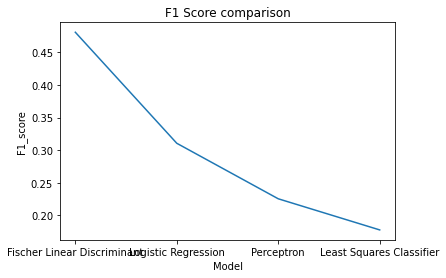

In [298]:
plt.plot(model_names, f1_score_list)
plt.title("F1 Score comparison")
plt.ylabel("F1_score")
plt.xlabel("Model")

[0.2945608351565594, 0.21759496182727756, 0.1270718232044199, 0.1764208503483065]


Text(0.5, 0, 'Model')

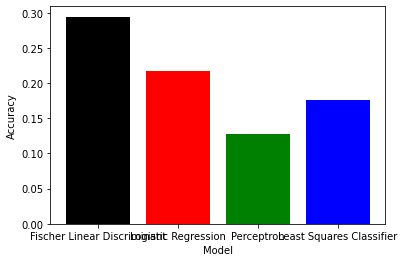

In [299]:
from sklearn.metrics import average_precision_score
average_precision_lr = average_precision_score(y_test, y_pred_lr)
average_precision_prtn = average_precision_score(y_test, y_pred_prtn)
average_precision_lq = average_precision_score(y_test, y_pred)
average_precision_fishers = average_precision_score(y_test, y_pred_fisher)

average_precision_list = [average_precision_fishers, average_precision_lr, average_precision_prtn, average_precision_lq ]
print(average_precision_list)
plt.bar(model_names, average_precision_list, color=['black', 'red', 'green', 'blue'])
plt.ylabel("Accuracy")
plt.xlabel("Model")

# Conclusions

Summarize your work here. 
Which classifier do you think the best? 
Discuss the challenges or somethat that you learned. 
If you have any suggestion about the assignment, you can write about it. <br>

To summarize I have implemented 4 of the 5 algorithms given from the PRML package and Evaluated the models based on different evaluation metrics like Precision, Accuracy and F1 score. The observation here is the Fischer's Linear Discriminant does better in every metric when compared to the other models. Hence I conclude that the FIscher's linear Discriminant is the best model for the given dataset.<br>

There are no serious challenges encountered while implementing the algorithms as the inner methods of the package have a structured method naming and usage which made it easy to implement them directly. One small challenge was encountered when implementing the perceptron algorithm which needed a little bit more of data preprocessing as it takes in -1 or 1 unlike the 0 and 1 in the data set.
<br>

Thank you 



# References

1. Bishop : “pattern recognition and machine learning"
2. Sklearn Documentation
3. PRML Documentation